<IPython.core.display.Javascript object>


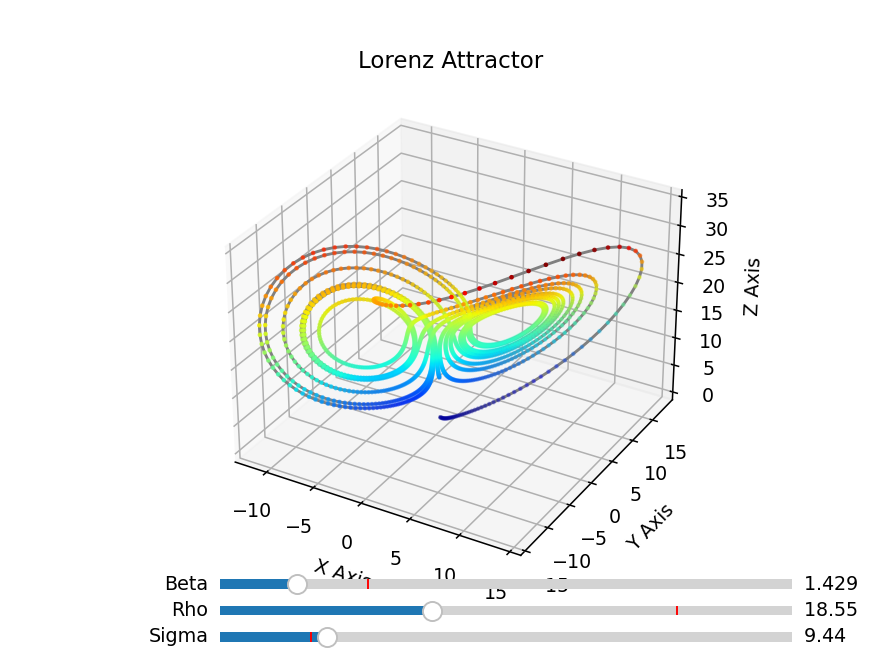

In [4]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
def lorenz(x, y, z, sigma=8, rho=40, beta=2.667):
    x_dot = sigma*(y - x)
    y_dot = rho*x - y - x*z
    z_dot = x*y - beta*z
    return x_dot, y_dot, z_dot

dt = 0.01
num_steps = 2000
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

xs[0], ys[0], zs[0] = (0., 1., 1.05)
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs, ys, zs, s=2, c=plt.cm.jet(zs / max(zs)))
ax.plot(xs, ys, zs, color='grey')
ax.set_xlabel("Axes des X")
ax.set_ylabel("Axes des Y")
ax.set_zlabel("Axes des Z")
ax.set_title("Effet papillon")

# slider
axcolor = 'lightgoldenrodyellow'
ax_sigma = plt.axes([0.25, 0.02, 0.65, 0.03], facecolor=axcolor)
ax_rho = plt.axes([0.25, 0.06, 0.65, 0.03], facecolor=axcolor)
ax_beta = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)

sigma=8
rho=40
beta=2.667

s_sigma = Slider(ax_sigma, 'Sigma', 0.1, 50.0, valinit=sigma)
s_rho = Slider(ax_rho, 'Rho', 0.1, 50.0, valinit=rho)
s_beta = Slider(ax_beta, 'Beta', 0.1, 10.0, valinit=beta)

def update(val):
    sigma = s_sigma.val
    rho = s_rho.val
    beta = s_beta.val

    for i in range(num_steps):
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i], sigma, rho, beta)
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    
    ax.clear()
    ax.scatter(xs, ys, zs, s=2, c=plt.cm.jet(zs / max(zs)))
    ax.plot(xs, ys, zs, color='grey')
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title("Lorenz Attractor")
    fig.canvas.draw_idle()

s_sigma.on_changed(update)
s_rho.on_changed(update)
s_beta.on_changed(update)

plt.show()